In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [4]:
df=pd.read_csv('car_data.csv')

In [5]:
df.shape

(301, 9)

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [32]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [16]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [17]:
df.corr()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [20]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [23]:
df['Selling_type'].value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

In [24]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

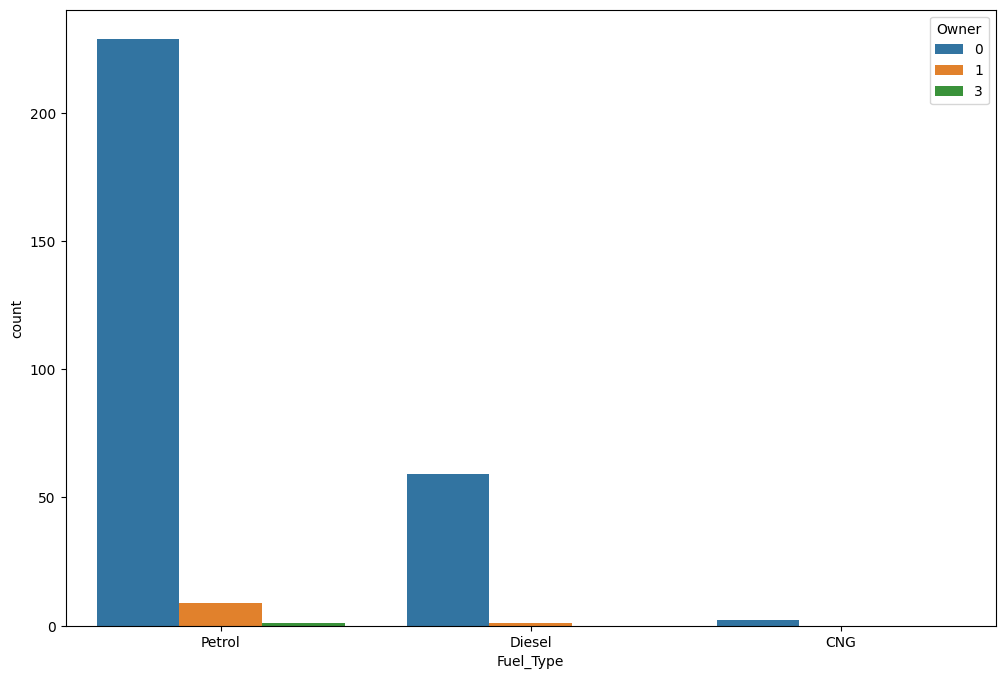

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x='Fuel_Type', hue='Owner',data=df)

In [29]:
#replacing the text to numerical data- encoding the catogerical data
#fuel_type column
df.replace({'Fuel_Type': {'Petrol':0, 'Diesel':1, 'CNG':2}}
           ,inplace =True)

In [34]:
df.replace({'Selling_type': {'Dealer':0, 'Individual':1}},
          inplace=True)

In [35]:
df.replace({'Transmission': {'Manual':0, 'Automatic':1}},
          inplace=True)

In [36]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type          int64
Selling_type       int64
Transmission       int64
Owner              int64
dtype: object

In [37]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [39]:
#splitting the data
x=df.drop(['Selling_Price','Car_Name'],axis=1)
y=df['Selling_Price']

In [40]:
x.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1
                                              ,random_state=2)

In [42]:
#using linear regression model
lg=LinearRegression()

In [43]:
lg.fit(x_train,y_train)

LinearRegression()

In [44]:
lg.score(x_test,y_test)

0.8365861023210721

In [45]:
lg.score(x_train,y_train)

0.8796483009370218

In [49]:
train_pred=lg.predict(x_train)
#evaluation of the model
#R squared error
error_score=metrics.r2_score(y_train,train_pred)
print(error_score)

0.8796483009370218


In [50]:
test_pred=lg.predict(x_test)
#evaluation of the model
#R squared error
error_score1=metrics.r2_score(y_test,test_pred)
print(error_score1)

0.8365861023210721


Text(0.5, 1.0, 'actual prices vs predicted prices')

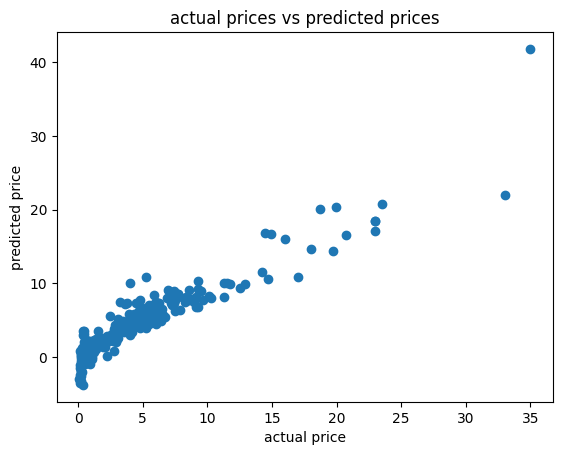

In [52]:
#plotting the actual and predicted prices
plt.scatter(y_train, train_pred)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")

Text(0.5, 1.0, 'actual prices vs predicted prices')

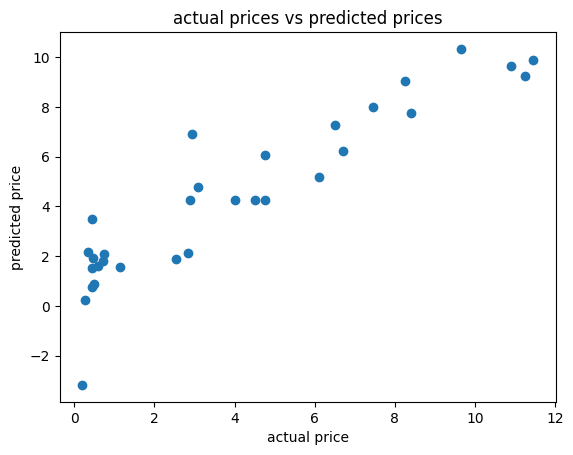

In [53]:
plt.scatter(y_test, test_pred)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")

In [61]:
#lasso regression
las_reg=Lasso()

In [62]:
las_reg.fit(x_train,y_train)

Lasso()

In [63]:
train_pred1=las_reg.predict(x_train)
#evaluation of the model
#R squared error
error_score=metrics.r2_score(y_train,train_pred1)
print(error_score)

0.8424480718240743


In [64]:
test_pred1=las_reg.predict(x_test)
#evaluation of the model
#R squared error
error_score1=metrics.r2_score(y_test,test_pred1)
print(error_score1)

0.8709763132343395


Text(0.5, 1.0, 'actual prices vs predicted prices')

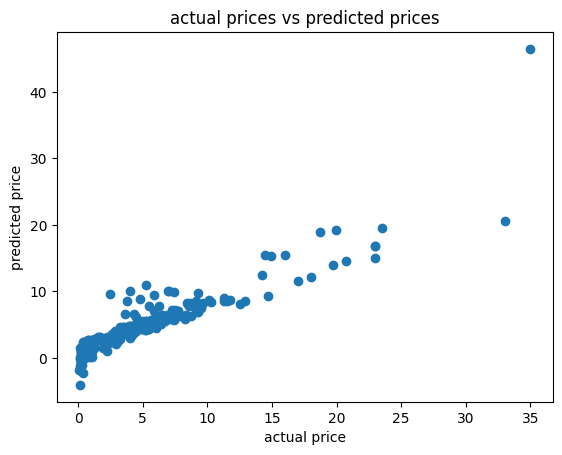

In [65]:
#plotting the actual and predicted prices
plt.scatter(y_train, train_pred1)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")

Text(0.5, 1.0, 'actual prices vs predicted prices')

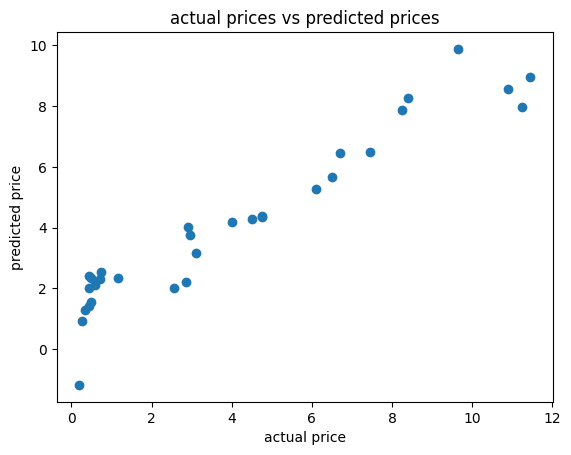

In [66]:
plt.scatter(y_test, test_pred1)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")